## Om Shree
## 2006077
## IT-2 T&TL Evaluation

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import html5lib

## Q1
Given state, find year-wise the district with highest crime rate.

In [11]:
# Reading data for question-1 :-
df = pd.read_csv("ic.csv")
df.head()

,STATEUT,DISTRICT,Year,Rape,KidnappingandAbduction,DowryDeaths,Assaultonwomenwithintenttooutragehermodesty,InsulttomodestyofWomen,CrueltybyHusbandorhisRelatives,ImportationofGirls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [33]:
# User input :-
state = input("Enter state name: ")

# Create a new aggregate feature 'crime' :-
cname = ['Rape', 'KidnappingandAbduction', 'DowryDeaths', 
           'Assaultonwomenwithintenttooutragehermodesty', 
           'InsulttomodestyofWomen', 'CrueltybyHusbandorhisRelatives', 
           'ImportationofGirls']
df['crime'] = df[cname].sum(axis=1)

# Find district with max_crime :-
for x in range (1, 13):
    max = 0
    dis = ''
    for index, row in df.iterrows():
        if (row.STATEUT==state and row.Year==2000+x and 
        row.DISTRICT!='TOTAL' and row.DISTRICT!='DELHI UT TOTAL'):
            if (row.crime) > max:
                max = row.crime
                dis = row.DISTRICT
    print("Year:", 2000+x, "\nDistrict : ",dis)

Enter state name: BIHAR
Year: 2001 
District :  MUZAFFARPUR
Year: 2002 
District :  MADHUBANI
Year: 2003 
District :  MADHUBANI
Year: 2004 
District :  VAISHALI
Year: 2005 
District :  PATNA
Year: 2006 
District :  PATNA
Year: 2007 
District :  PATNA
Year: 2008 
District :  PATNA
Year: 2009 
District :  PATNA
Year: 2010 
District :  PATNA
Year: 2011 
District :  DARBHANGA
Year: 2012 
District :  PATNA


## Q2
Find the state which imporoved the most year on year

In [37]:
# Best state which improved crime record year by year
grouped_data = df.groupby(['STATEUT', 'Year']).sum()
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['% Change'] = grouped_data.groupby(['STATEUT'])['Total'].pct_change()

state_best_imprv = grouped_data.groupby(['STATEUT'])['% Change'].agg('sum').idxmin()
print('State with best crime record improvement: ', state_best_imprv)

State with best crime record improvement:  PUDUCHERRY


## Q3
Canny Edge detection 

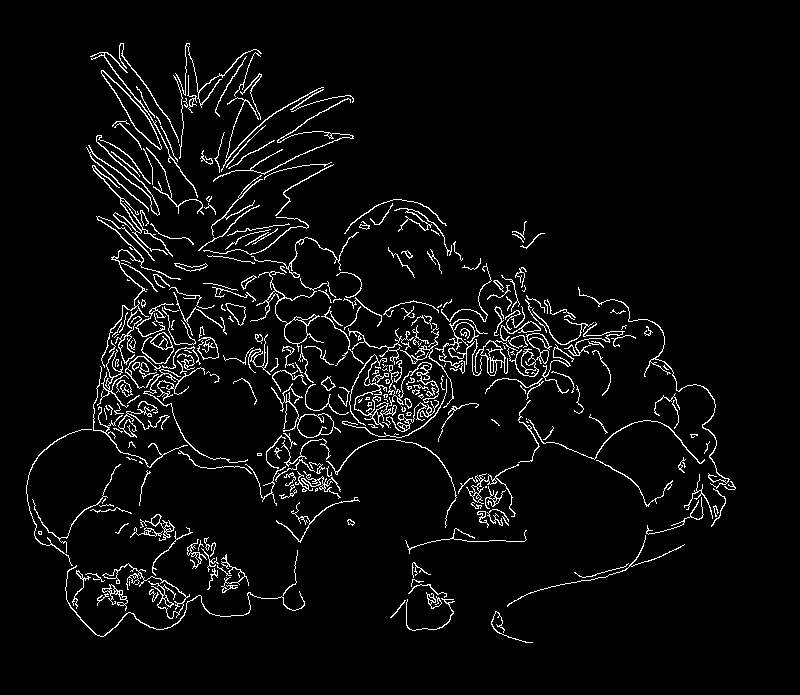

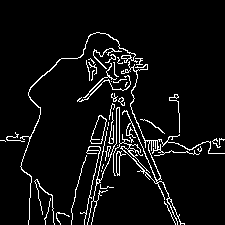

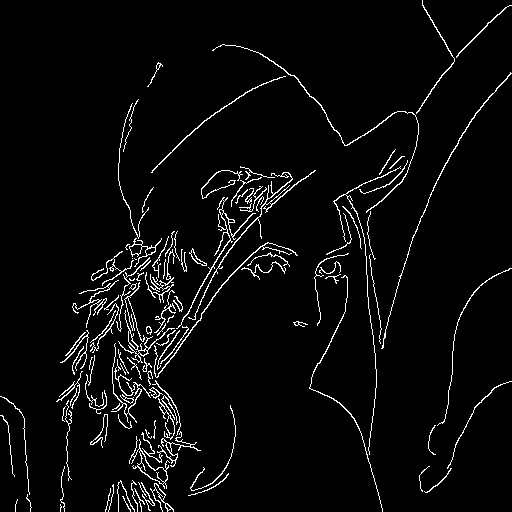

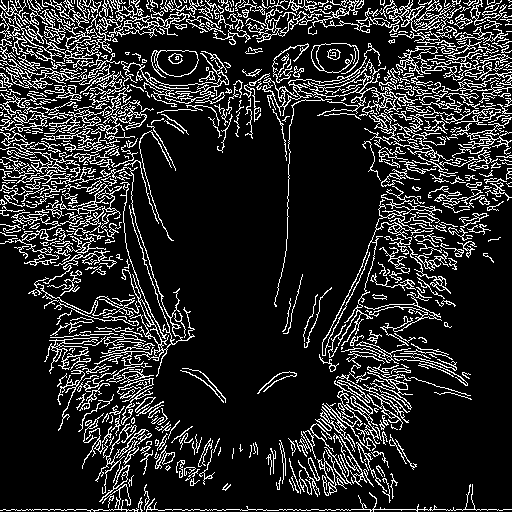

In [34]:
# Canny edge detection :-

# Read the image :-
img1 = cv.imread('original/fruit.jpg', 0)
img2 = cv.imread('original/index.jpg', 0)
img3 = cv.imread('original/Lenna.png', 0)
img4 = cv.imread('original/baboon.png', 0)

# Apply a low-pass filter :-
kernel = np.ones((3, 3), np.float32) / 9
dst1 = cv.filter2D(img1, -1, kernel)
dst2 = cv.filter2D(img2, -1, kernel)
dst3 = cv.filter2D(img3, -1, kernel)
dst4 = cv.filter2D(img4, -1, kernel)

# Apply Canny edge detection :-
edges1 = cv.Canny(dst1, 70, 200)
edges2 = cv.Canny(dst2, 70, 200)
edges3 = cv.Canny(dst3, 70, 200)
edges4 = cv.Canny(dst4, 70, 200)

# Show the images :-
cv2_imshow(edges1)
cv2_imshow(edges2)
cv2_imshow(edges3)
cv2_imshow(edges4)

## Q4
Sobel edge detection

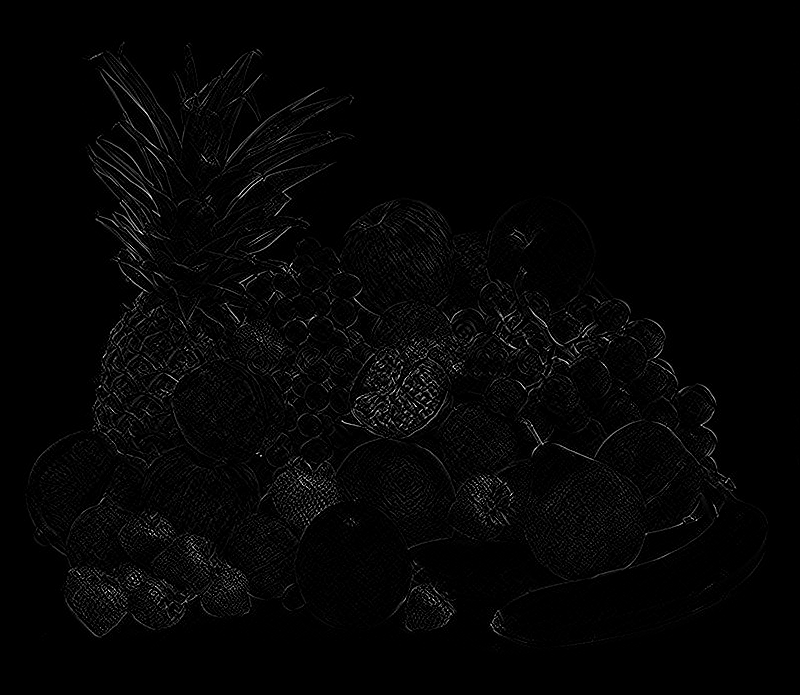

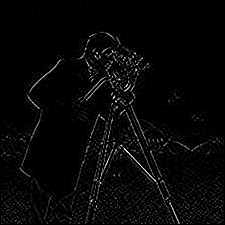

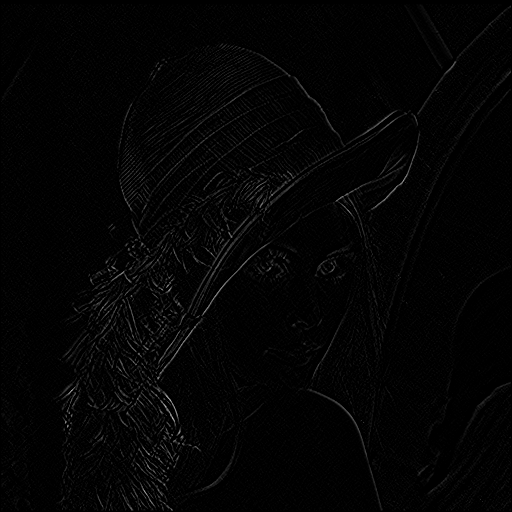

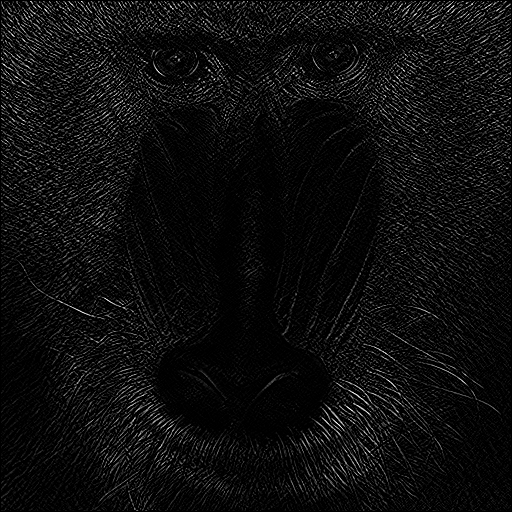

In [36]:
# Calculating sobel gradients for each image :
sobelx1 = cv.Sobel(img1, cv.CV_64F, 1, 0, ksize=5)
sobely1 = cv.Sobel(img1, cv.CV_64F, 0, 1, ksize=5)
sobelxy1 = cv.Sobel(img1, cv.CV_64F, 1, 1, 5)
gradient = np.sqrt(sobelx1 ** 2 + sobely1 ** 2).astype(np.uint8)

sobelx2 = cv.Sobel(img2, cv.CV_64F, 1, 0, ksize=5)
sobely2 = cv.Sobel(img2, cv.CV_64F, 0, 1, ksize=5)
sobelxy2 = cv.Sobel(img2, cv.CV_64F, 1, 1, 5)
gradient = np.sqrt(sobelx2 ** 2 + sobely2 ** 2).astype(np.uint8)

sobelx3 = cv.Sobel(img3, cv.CV_64F, 1, 0, ksize=5)
sobely3 = cv.Sobel(img3, cv.CV_64F, 0, 1, ksize=5)
sobelxy3 = cv.Sobel(img3, cv.CV_64F, 1, 1, 5)
gradient = np.sqrt(sobelx3 ** 2 + sobely3 ** 2).astype(np.uint8)

sobelx4 = cv.Sobel(img4, cv.CV_64F, 1, 0, ksize=5)
sobely4 = cv.Sobel(img4, cv.CV_64F, 0, 1, ksize=5)
sobelxy4 = cv.Sobel(img4, cv.CV_64F, 1, 1, 5)
gradient = np.sqrt(sobelx4 ** 2 + sobely4 ** 2).astype(np.uint8)

# Edge detection using sobel filter :-
cv2_imshow(sobelxy1)
cv2_imshow(sobelxy2)
cv2_imshow(sobelxy3)
cv2_imshow(sobelxy4)